# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV data into a dataframe

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
data = pd.read_csv(url)
data.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [3]:
# Examine the current column names

print("Current column names:")
print(data.columns)

Current column names:
Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')


In [4]:
# Standardize column names

data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [5]:
# Rename st column 
data = data.rename(columns={'st': 'state'})
data.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [6]:
# Verify the changes
print("Modified column names:")
print(data.columns)

Modified column names:
Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [7]:
# Clean the "gender" column
data["gender"].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [8]:
gender_mapping = {'M': 'M', 'Male': 'M', 'F': 'F', 'Female': 'F', 'Femal': 'F', 'female': 'F'}
data['gender'] = data['gender'].map(gender_mapping)
data["gender"].unique()

array([nan, 'F', 'M'], dtype=object)

In [9]:
# Clean the "state" column
state_mapping = {'AZ': 'Arizona', 'Cali': 'California', 'WA': 'Washington'}
data['state'] = data['state'].replace(state_mapping)
data['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [10]:
# Clean the "education" column
data['education'] = data['education'].apply(lambda x: 'Bachelor' if pd.notna(x) and 'Bachelors' in x else x)

# Check unique values in the "education" column after cleaning
data['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [11]:
# Clean the "customer_lifetime_value" column
data['customer_lifetime_value'] = data['customer_lifetime_value'].str.replace('%', '').astype(float)
data['customer_lifetime_value'].unique()

array([       nan,  697953.59, 1288743.17, ..., 2031499.76,  323912.47,
        899704.02])

In [12]:
# Clean the "vehicle_class" column

data.vehicle_class.value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: count, dtype: int64

In [13]:
car_list = ['Sports Car', 'Luxury SUV', 'Luxury Car']

data.vehicle_class = np.where(data.vehicle_class.isin(car_list),'Luxury',data.vehicle_class)

In [14]:
data.vehicle_class.value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: count, dtype: int64

In [15]:
data.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [16]:
data['customer_lifetime_value'].dtype

dtype('float64')

In [17]:
# Already numeric

In [18]:
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [19]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [20]:
import pandas as pd
import numpy as np

In [21]:
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [22]:
# Extract the mean values and convert them to numeric type
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.split('/').str[1].astype(float)

# Print the unique values after the transformation
print(data['number_of_open_complaints'].unique())

[ 0.  2.  1.  3.  5.  4. nan]


In [23]:
data.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [24]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index(['customer', 'state', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')


In [25]:
null_counts = data[null_columns].isnull().sum()
print(null_counts)

customer                     2937
state                        2937
gender                       3054
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64


In [26]:
# Fill null values in non-numeric columns with mode
for column in null_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])

In [27]:
# Fill null values in numeric columns with the mean
for column in null_columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column] = data[column].fillna(data[column].mean())

In [28]:
null_columns = data.columns[data.isnull().any()]
print(null_columns)

Index([], dtype='object')


In [29]:
null_counts = data[null_columns].isnull().sum()
print(null_counts)


Series([], dtype: float64)


In [30]:
# Define a function to check if a column is numeric
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(column)

# Convert numeric columns to integers
numeric_columns = data.select_dtypes(include=[np.number])
data[numeric_columns.columns] = numeric_columns.applymap(int)

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_1699/1049548313.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[numeric_columns.columns] = numeric_columns.applymap(int)


In [31]:
data.dtypes

customer                     object
state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [32]:
# Identify duplicate rows
duplicates = data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4003     True
4004     True
4005     True
4006     True
4007     True
Length: 4008, dtype: bool

In [33]:
duplicate_counts = duplicates.value_counts()
duplicate_counts

True     2936
False    1072
Name: count, dtype: int64

In [34]:
# Decide on a strategy for handling duplicates
# Drop all duplicate rows
data_cleaned = data.drop_duplicates()
data_cleaned

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,793690,0,1000,0,Personal Auto,Four-Door Car,2
1,QZ44356,Arizona,F,Bachelor,697953,0,94,0,Personal Auto,Four-Door Car,1131
2,AI49188,Nevada,F,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
3,WW63253,California,M,Bachelor,764586,0,106,0,Corporate Auto,SUV,529
4,GA49547,Washington,M,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,2031499,63209,102,2,Personal Auto,SUV,207
1068,GS98873,Arizona,F,Bachelor,323912,16061,88,0,Personal Auto,Four-Door Car,633
1069,CW49887,California,F,Master,462680,79487,114,0,Special Auto,SUV,547
1070,MY31220,California,F,College,899704,54230,112,0,Personal Auto,Two-Door Car,537


In [35]:
# Verify that duplicates are removed
duplicates_after_cleaning = data_cleaned.duplicated()
duplicates_after_cleaning 

0       False
1       False
2       False
3       False
4       False
        ...  
1067    False
1068    False
1069    False
1070    False
1071    False
Length: 1072, dtype: bool

In [36]:
duplicate_cleaned_counts = duplicates_after_cleaning.value_counts()
duplicate_cleaned_counts

False    1072
Name: count, dtype: int64

In [37]:
data_cleaned = data_cleaned.drop_duplicates().reset_index(drop=True)
data_cleaned

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,793690,0,1000,0,Personal Auto,Four-Door Car,2
1,QZ44356,Arizona,F,Bachelor,697953,0,94,0,Personal Auto,Four-Door Car,1131
2,AI49188,Nevada,F,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
3,WW63253,California,M,Bachelor,764586,0,106,0,Corporate Auto,SUV,529
4,GA49547,Washington,M,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,2031499,63209,102,2,Personal Auto,SUV,207
1068,GS98873,Arizona,F,Bachelor,323912,16061,88,0,Personal Auto,Four-Door Car,633
1069,CW49887,California,F,Master,462680,79487,114,0,Special Auto,SUV,547
1070,MY31220,California,F,College,899704,54230,112,0,Personal Auto,Two-Door Car,537


In [38]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)

# Round 3

Lab | Customer Analysis Round 3
Get the data
For this lab, we will continue using the csv file that was downloaded in the previous lab as well as the Jupyter Notebook.
There is NO NEED to fork and clone this repository.

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the Gender breakdown.
- Show a plot of Income by State.
- Show a plot of the Policy Type by the Total Claim Amount.
- Show a plot of the Education by Vehicle Class.
- What insights can you establish from these plots?
- What other plots do you feel would be beneficial?

In [39]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import seaborn as sns
print(sns.__version__)

0.13.0


In [42]:
sns.set_palette(['orange', 'blue', 'green', "purple", "red"])  
sns.set_palette("husl")

In [43]:
# Show DataFrame info.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer                   4008 non-null   object
 1   state                      4008 non-null   object
 2   gender                     4008 non-null   object
 3   education                  4008 non-null   object
 4   customer_lifetime_value    4008 non-null   int64 
 5   income                     4008 non-null   int64 
 6   monthly_premium_auto       4008 non-null   int64 
 7   number_of_open_complaints  4008 non-null   int64 
 8   policy_type                4008 non-null   object
 9   vehicle_class              4008 non-null   object
 10  total_claim_amount         4008 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 344.6+ KB


In [44]:
# Describe DataFrame.

data.describe()

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
count,4.008000e+03,4008.000000,4008.000000,4008.000000,4008.000000
mean,7.936899e+05,39295.187375,193.062625,0.105289,404.141218
std,3.320523e+05,15745.139241,827.418430,0.488849,151.430161
min,2.004350e+05,0.000000,61.000000,0.000000,0.000000
25%,7.936900e+05,39295.000000,145.750000,0.000000,404.000000
50%,7.936900e+05,39295.000000,193.000000,0.000000,404.000000
75%,7.936900e+05,39295.000000,193.000000,0.000000,404.000000
max,5.816655e+06,99960.000000,35354.000000,5.000000,2893.000000


/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_1699/10062565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=data, palette="husl")


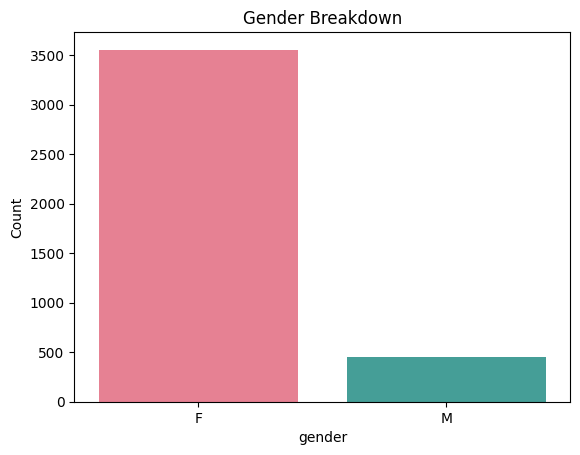

In [45]:
# Show a plot of the Gender breakdown.

sns.countplot(x='gender', data=data, palette="husl")
plt.title('Gender Breakdown')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_1699/2393364912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='income', data=data, palette="husl")


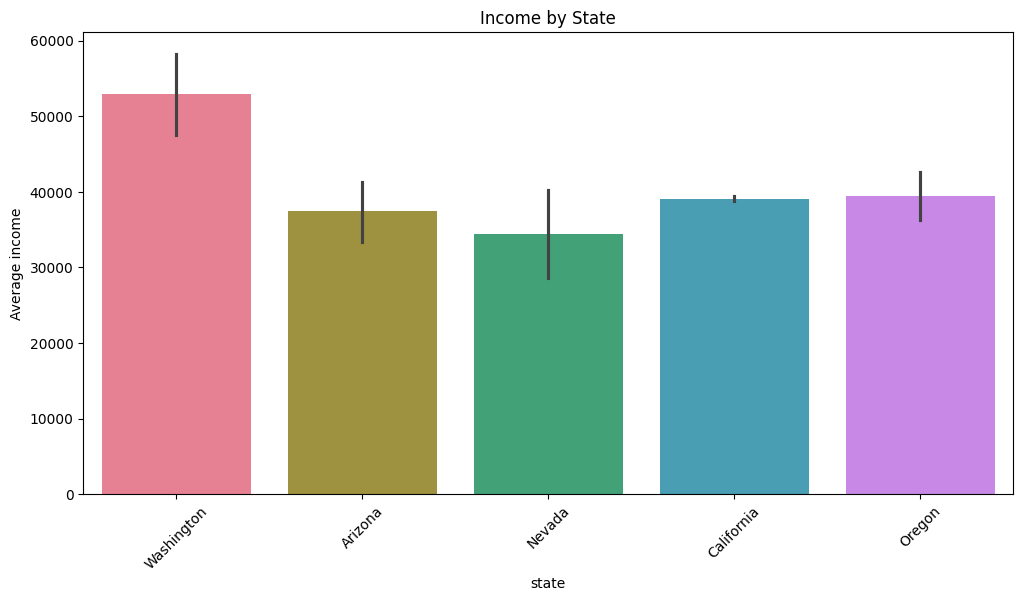

In [46]:
# Show a plot of Income by State.

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='income', data=data, palette="husl")
plt.title('Income by State')
plt.xlabel('state')
plt.ylabel('Average income')
plt.xticks(rotation=45)
plt.show()

/var/folders/09/qkspll5d37l0g2941hv9rvs80000gn/T/ipykernel_1699/2976333823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='policy_type', y='total_claim_amount', data=data, palette="husl")


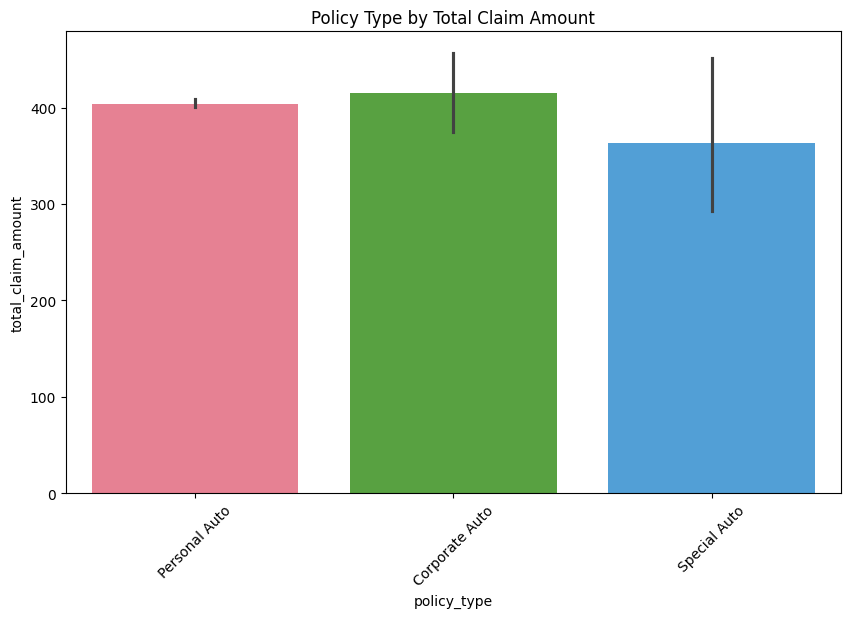

In [47]:
# Show a plot of the Policy Type by the Total Claim Amount.

plt.figure(figsize=(10, 6))
sns.barplot(x='policy_type', y='total_claim_amount', data=data, palette="husl")
plt.title('Policy Type by Total Claim Amount')
plt.xlabel('policy_type')
plt.ylabel('total_claim_amount')
plt.xticks(rotation=45)
plt.show()

In [48]:
data.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,793690,0,1000,0,Personal Auto,Four-Door Car,2
1,QZ44356,Arizona,F,Bachelor,697953,0,94,0,Personal Auto,Four-Door Car,1131
2,AI49188,Nevada,F,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
3,WW63253,California,M,Bachelor,764586,0,106,0,Corporate Auto,SUV,529
4,GA49547,Washington,M,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17


[None, None, None, None, None]

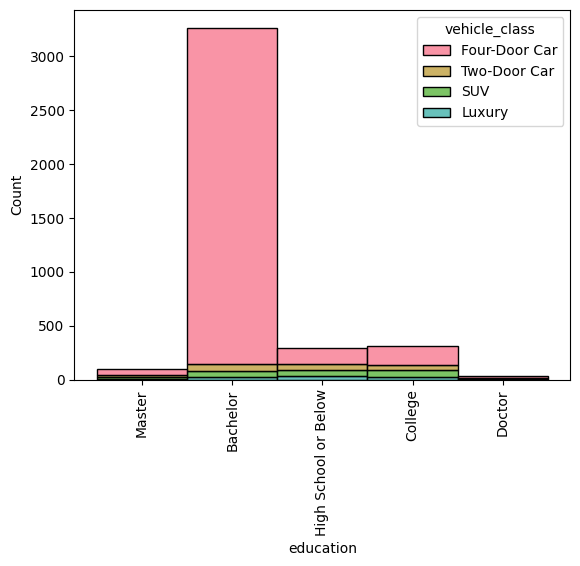

In [49]:
# Show a plot of the Education by Vehicle Class.
g = sns.histplot(x="education", hue="vehicle_class", data=data, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

**What insights can you establish from these plots?**

- There are more Female clients than Male clients.
- The clients in Washington State have the highest income averages and the ones in Nevada state have the lowest.
- The Corporate policies have the highest average claim amounts, but there is little difference with Personal policies.
- The most luxury cars are insured for people with a high school or below education level.

**What other plots do you feel would be beneficial?**

**1. Relationship between "State" and "Income":** could help identify significant differences in average income between states.

**2. "Gender" and "Education":** this could reveal educational patterns based on customer gender.

**3. "Monthly Premium Auto" and "Total Claim Amount":** could reveal whether customers paying higher premiums make larger claims.

**4. "Policy Type" and "Customer Lifetime Value":** could help identify if certain policy types are associated with higher or lower customer lifetime values.

**5. "Number of Open Complaints" and "Total Claim Amount":** could indicate whether customers with more complaints file larger claims.

**6. "Income" and "Education":** could reveal trends in education and income among your customers.

**7. "Vehicle Class" and "Total Claim Amount":** could help identify if certain vehicle classes are associated with more expensive claims.

**8. "Income" and "Customer Lifetime Value":** to explore if there's a relationship or trend between a customer's income and their lifetime value.

# Round 4

Lab | Customer Analysis Round 4 In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model.

- Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually

1. Use seaborn library to construct distribution plots for the numerical variables
2. Use Matplotlib to construct histograms
3. Do the distributions for different numerical variables look like a normal distribution?

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [50]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Check the data types of the columns

numerical = data.select_dtypes(include=np.number)  # Numeric data
categorical = data.select_dtypes(include=object)  # Categorical data

In [52]:
data.dtypes

customer                     object
state                        object
gender                       object
education                    object
customer_lifetime_value       int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     int64
policy_type                  object
vehicle_class                object
total_claim_amount            int64
dtype: object

In [53]:
print("Numerical data:", numerical.columns)
print("Categorical data:", categorical.columns)

Numerical data: Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')
Categorical data: Index(['customer', 'state', 'gender', 'education', 'policy_type',
       'vehicle_class'],
      dtype='object')


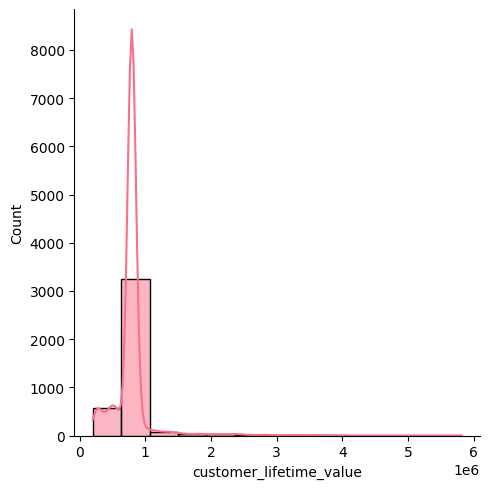

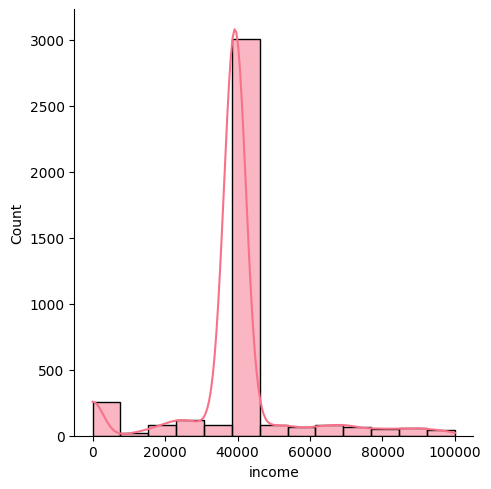

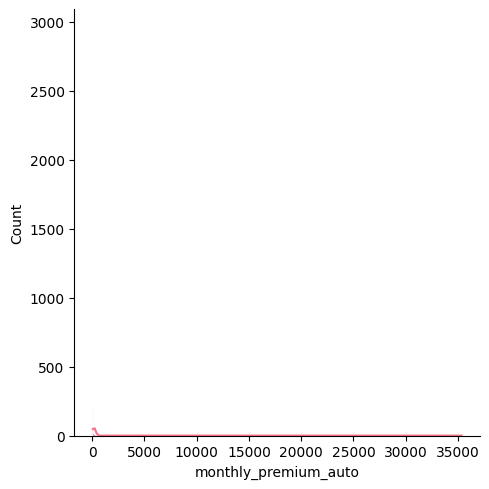

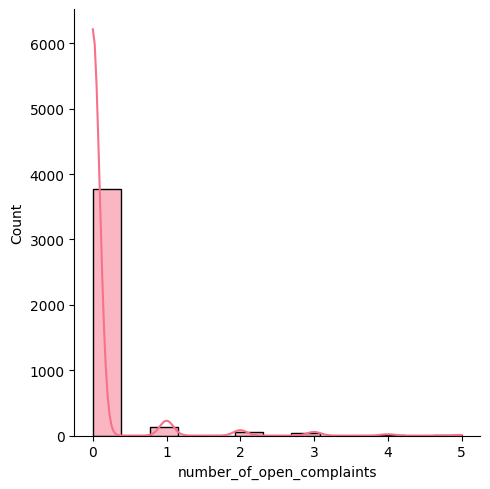

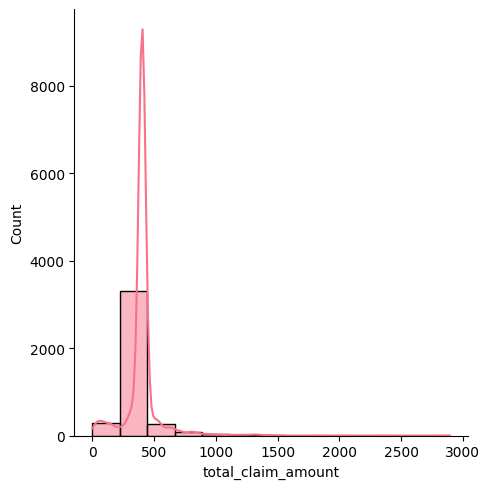

In [54]:
# Visualize the distributions of numerical variables

for column in numerical.columns:
    sns.displot(numerical[column],kde=True)
    plt.show()

<Axes: xlabel='monthly_premium_auto', ylabel='count'>

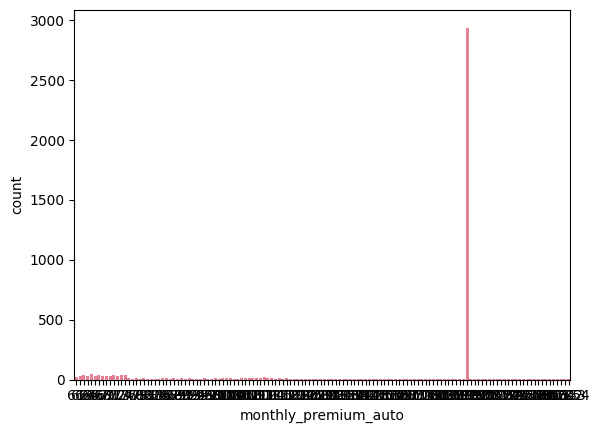

In [55]:
sns.countplot(data= numerical,x='monthly_premium_auto')

In [56]:
# Check for multicollinearity between numerical features

correlations = numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.041610,0.005027,-0.026296,0.131439
income,0.041610,1.000000,0.049100,-0.003880,-0.361293
monthly_premium_auto,0.005027,0.049100,1.000000,0.023529,-0.040522
number_of_open_complaints,-0.026296,-0.003880,0.023529,1.000000,0.008423
total_claim_amount,0.131439,-0.361293,-0.040522,0.008423,1.000000


In [57]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [58]:
import seaborn as sns

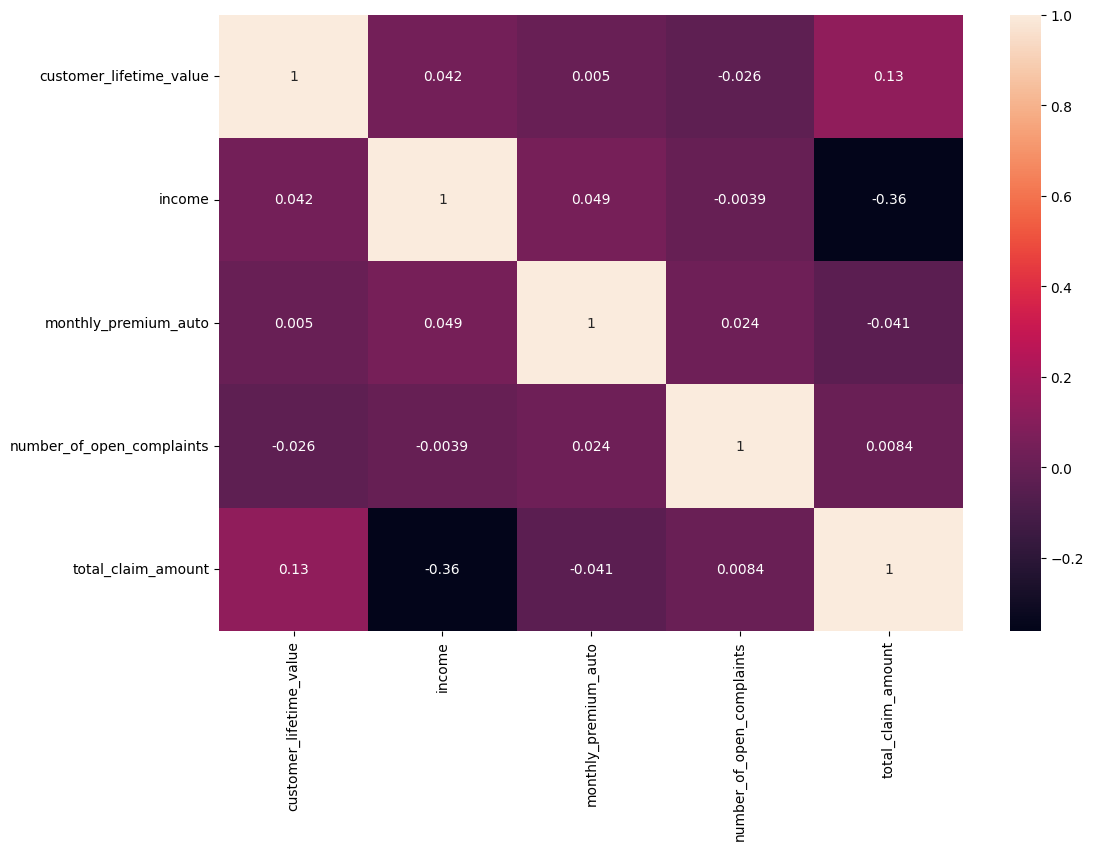

In [60]:
# Plot a heatmap of the correlation matrix

fig, ax=plt.subplots(figsize=(12,8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

### It doesn't seem to be any Mulicolliniarity.